In [109]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import shapely
import geopandas as gpd

import quickplot as qp

In [110]:
election = gpd.read_file('election-map.geojson')
election.head()

,FID,dem,dempc,geometry,gop,goppc,grn,lib,margin,name,newstate,oth,population,state,una,votes
0,1001,5908,0.239569,"POLYGON ((892112.80012558 1115678.795392964, 8...",18110,0.734358,105,538,0.494789,Autauga,AL,0,54571,AL,0,24661
1,1003,18409,0.195653,"POLYGON ((780232.5698541742 947375.2080644479,...",72780,0.773515,453,2448,0.577862,Baldwin,AL,0,182265,AL,0,94090
2,1005,4848,0.466603,"POLYGON ((1026127.598653847 1057957.143773036,...",5431,0.522714,18,93,0.056112,Barbour,AL,0,27457,AL,0,10390
3,1007,1874,0.214220,"POLYGON ((845034.8675876737 1149437.158844963,...",6733,0.769662,17,124,0.555441,Bibb,AL,0,22915,AL,0,8748
4,1009,2150,0.084699,"POLYGON ((871035.6126721548 1287748.49965, 886...",22808,0.898519,89,337,0.813820,Blount,AL,0,57322,AL,0,25384


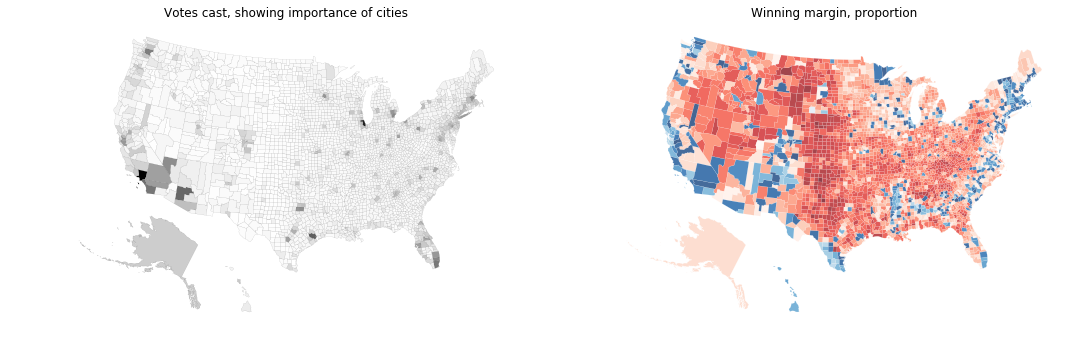

In [111]:
fig = plt.figure(figsize=(18,8))

ax = plt.subplot(121)
ax.set_aspect('equal')
ax.set_axis_off()
ax.set_title('Votes cast, showing importance of cities')
election['votes2'] = np.sqrt(election.votes)
qp.quickplot(election, column='votes2', cmap='Greys', alpha=1, edgecolor='k', linewidth=0.05)

ax = plt.subplot(122)
ax.set_aspect('equal')
ax.set_axis_off()
ax.set_title('Winning margin, proportion')
qp.quickplot(election[election.margin>0], column='margin', cmap='Reds', edgecolor='w', alpha=0.75, linewidth=0.15)
qp.quickplot(election[election.margin<=0], column='margin', cmap='Blues', edgecolor='w', alpha=0.75, linewidth=0.15)


In [112]:
# Make states from counties data c, 
# based on named state ID variable
def make_states(c, st='state'):
    st = c.dissolve(by=st, aggfunc='sum', as_index=False)
    # recalculate the proportion-based variables
    # since these don't combine by summation
    st.dempc = st.dem / st.votes
    st.goppc = st.gop / st.votes
    st.margin = st.goppc - st.dempc
    # add a variable to flag the winner
    # in each state - we'll assume D/R
    st['win'] = 'D'
    st.loc[st.gop > st.dem, 'win'] = 'R'
    return st

In [113]:
states = make_states(election, st='state')
states.head()

,state,geometry,FID,dem,dempc,gop,goppc,grn,lib,margin,oth,population,una,votes,votes2,win
0,AK,(POLYGON ((-1882164.772212857 419730.666193547...,2001,93007,0.377176,130415,0.528878,4445,14593,0.151702,4128,710231,0,246588,496.576278,R
1,AL,"POLYGON ((998843.1210250946 935438.8258693079,...",71489,718084,0.345538,1306925,0.628884,9287,43869,0.283347,0,4779736,0,2078165,10183.494266,R
2,AR,"POLYGON ((439573.2907305224 1177002.465449736,...",380625,378729,0.341624,677904,0.611487,9837,29518,0.269864,12627,2915918,0,1108615,7833.590050,R
3,AZ,POLYGON ((-1365876.729939255 1021579.408853245...,60208,936250,0.453871,1021154,0.495031,25255,80151,0.041159,0,6392017,0,2062810,4031.442085,R
4,CA,(POLYGON ((-2077428.848194205 1354705.72972257...,351364,7230699,0.616243,3841134,0.327364,215694,394239,-0.288879,51757,37253956,0,11733523,19400.883465,D


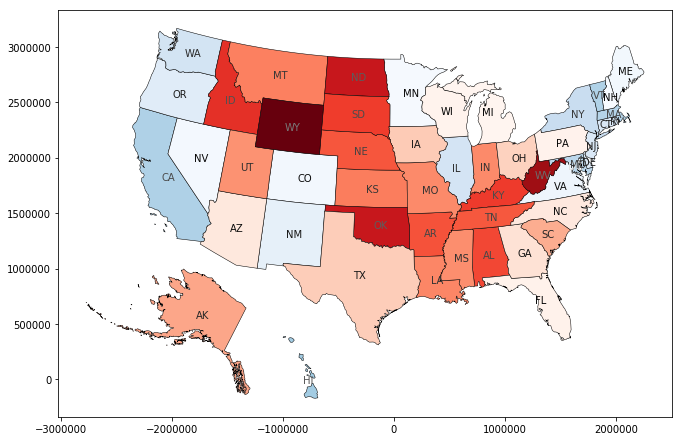

In [114]:
# plot those states
fig, ax = plt.subplots(figsize=(11,8))
ax.set_aspect('equal')
for p, t, m in zip(states.geometry, states.state, states.margin):
    col = tuple([abs(m)] * 3 + [1])
    ax.annotate(xy=(p.centroid.x-50000, p.centroid.y-30000), s=t, color=col)
qp.quickplot(states[states.margin<0], column='margin', cmap='Blues_r', edgecolor='k', linewidth=0.5)
qp.quickplot(states[states.margin>=0], column='margin', cmap='Reds', edgecolor='k', linewidth=0.5)
# qp.quickplot(states[states.win=='D'], facecolor='b', alpha=0.65, edgecolor='w', linewidth=1)
# qp.quickplot(states[states.win=='R'], facecolor='r', alpha=0.65, edgecolor='w', linewidth=1)

In [118]:
import randomstates as rs

In [126]:
election['newstate'] = rs.random_states(election)
states = make_states(election, st='newstate')
rs.run_election(election, statevar='newstate')

/Users/dosullivan/anaconda/envs/py3/lib/python3.6/site-packages/pysal/weights/weights.py:189: UserWarning: There are 5 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
/Users/dosullivan/anaconda/envs/py3/lib/python3.6/site-packages/pysal/weights/weights.py:190: UserWarning: Island ids: 67, 518, 519, 520, 521
  warnings.warn("Island ids: %s" % ', '.join(str(island) for island in self.islands))


{'dem': 279, 'gop': 259}

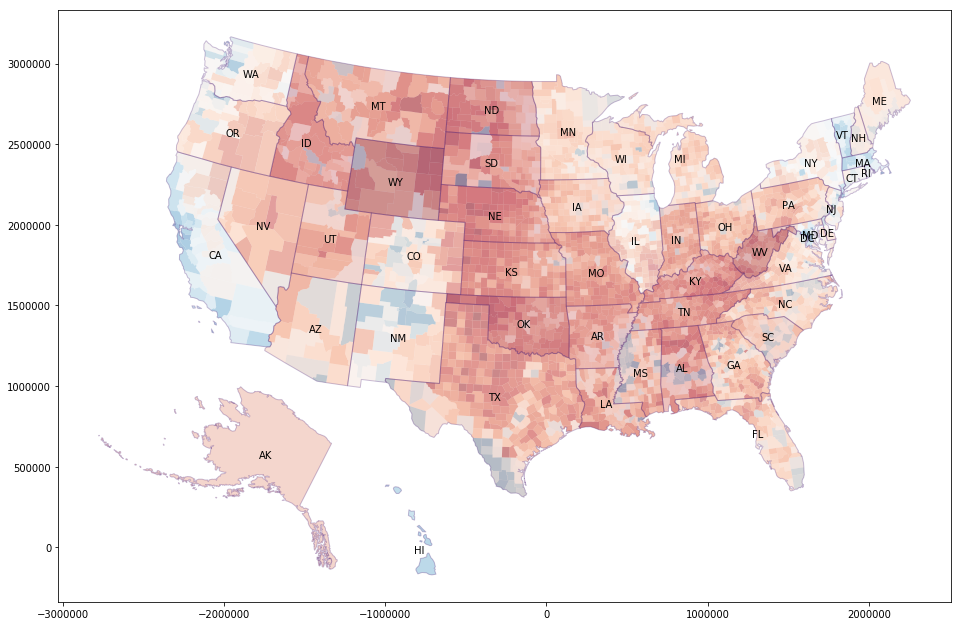

In [124]:
fig, ax = plt.subplots(figsize=(16,12))
ax.set_aspect('equal')
for p, t in zip(states.geometry, states.state):
    ax.annotate(xy=(p.centroid.x-50000, p.centroid.y-30000), s=t)
qp.quickplot(election, column='goppc', cmap='RdBu_r', linewidth=0.1, edgecolor='w', alpha=0.5)
qp.quickplot(states, column='margin', cmap='RdBu_r', edgecolor='#330066', linewidth=1, facecolor='w', alpha=0.25)